# Gamma Correction Experimentation

## Importing libraries

In [1]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plot # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

## Getting frame from video

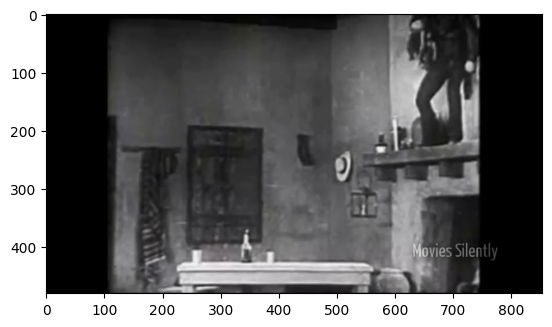

In [2]:
frame_number = 24
#Create video capture from fie, read specific frame 
cap = cv2.VideoCapture("Zorro.mp4")
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, I = cap.read()
cap.release()
# Show image in line
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plot.imshow(I) 
plot.show() 

## Conversion to YUV Colour Space
Luminance (Y) is what we care about here.

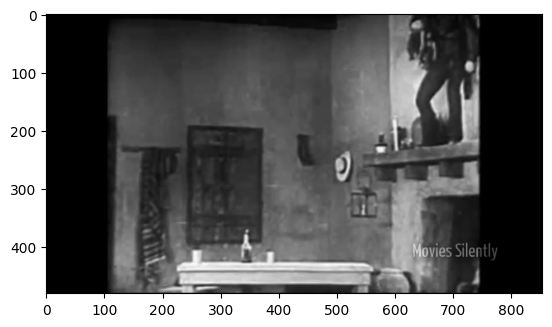

In [3]:
YUV = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
Y = YUV[:,:,0]
U = YUV[:,:,1]
V = YUV[:,:,2]
plot.imshow(Y, cmap='gray') 
plot.show()

## Gamma Correction

In [4]:
#Raise Y to the power of gamma value. 
#Gamma values lower than 1 brighten the image. 
#Gamma values higher than 1 darken the image.
gamma = 0.5
Y2 = pow(Y,gamma)
gamma = 0.25
Y3 = pow(Y,gamma)
gamma = 1.5
Y4 = pow(Y,gamma)

#Multiply by ratio between max values of original and new 
Y2 = (np.amax(Y)/np.amax(Y2) * Y2).astype(np.uint8) 
Y3 = (np.amax(Y)/np.amax(Y3) * Y3).astype(np.uint8)
Y4 = (np.amax(Y)/np.amax(Y4) * Y4).astype(np.uint8)

## Reassembling the YUV array and converting back to RGB

In [5]:
YUV2=np.stack((Y2,U,V),axis=2)
I2 = cv2.cvtColor(YUV2, cv2.COLOR_YUV2RGB)
YUV3=np.stack((Y3,U,V),axis=2)
I3 = cv2.cvtColor(YUV3, cv2.COLOR_YUV2RGB)
YUV4=np.stack((Y4,U,V),axis=2)
I4 = cv2.cvtColor(YUV4, cv2.COLOR_YUV2RGB)

## Create a plot with four subplots to compare four images

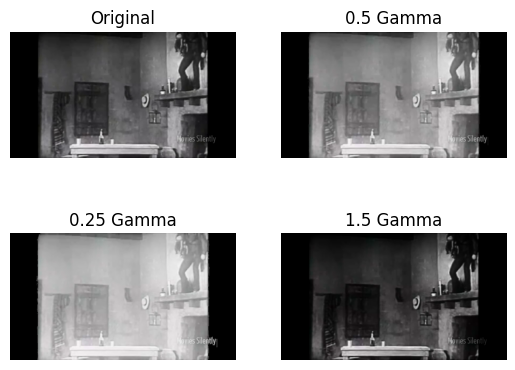

In [6]:
fig, axs = plot.subplots(2, 2)
axs[0,0].set_title('Original')
axs[0,1].set_title('0.5 Gamma')
axs[1,0].set_title('0.25 Gamma')
axs[1,1].set_title('1.5 Gamma')
axs[0,0].imshow(I)
axs[0,1].imshow(I2)
axs[1,0].imshow(I3)
axs[1,1].imshow(I4)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[1,0].axis("off")
axs[1,1].axis("off")
plot.show()

## Display using OpenCV

In [7]:
cv2.imshow("Original", I)
cv2.imshow("0.5 Gamma", I2)
cv2.imshow("0.25 Gamma", I3)
cv2.imshow("1.5 Gamma", I4)
key = cv2.waitKey(0)
cv2.destroyAllWindows()